In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':20})

# Raw performances

In [8]:
## command: ./serial -n 100;./serial -n 300;./serial -n 1000;./serial -n 3000;./serial -n 10000;./serial -n 30000;./serial -n 100000;./serial -n 300000
## output:
serial_outs = """Simulation Time = 0.00526875 seconds for 100 particles.
Simulation Time = 0.0160888 seconds for 300 particles.
Simulation Time = 0.0552175 seconds for 1000 particles.
Simulation Time = 0.170677 seconds for 3000 particles.
Simulation Time = 0.636754 seconds for 10000 particles.
Simulation Time = 2.00013 seconds for 30000 particles.
Simulation Time = 6.77681 seconds for 100000 particles.
Simulation Time = 23.3615 seconds for 300000 particles.
Simulation Time = 162.000 seconds for 1000000 particles."""

## srun -n 1 -c 64 ./openmp -n 100;srun -n 1 -c 64 ./openmp -n 300;srun -n 1 -c 64 ./openmp -n 1000;srun -n 1 -c 64 ./openmp -n 3000;srun -n 1 -c 64 ./openmp -n 10000;srun -n 1 -c 64 ./openmp -n 30000;srun -n 1 -c 64 ./openmp -n 100000;srun -n 1 -c 64 ./openmp -n 300000;srun -n 1 -c 64 ./openmp -n 1000000
omp_outs = """Simulation Time = 0.0106166 seconds for 100 particles.
Simulation Time = 0.0109703 seconds for 300 particles.
Simulation Time = 0.0182556 seconds for 1000 particles.
Simulation Time = 0.0405677 seconds for 3000 particles.
Simulation Time = 0.122578 seconds for 10000 particles.
Simulation Time = 0.326998 seconds for 30000 particles.
Simulation Time = 1.06943 seconds for 100000 particles.
Simulation Time = 3.73524 seconds for 300000 particles.
Simulation Time = 15.0777 seconds for 1000000 particles.
Simulation Time = 65.0878 seconds for 3000000 particles."""





In [9]:
serial_times    = np.array([float(line.split(' ')[3] ) for line in serial_outs.split('\n')])
serial_numparts = np.array([float(line.split(' ')[-2]) for line in serial_outs.split('\n')])
omp_times    = np.array([float(line.split(' ')[3] ) for line in omp_outs.split('\n')])
omp_numparts = np.array([float(line.split(' ')[-2]) for line in omp_outs.split('\n')])

Slope : 1.1219518556434533
Slope (last 2 steps) : 1.3784897049551794


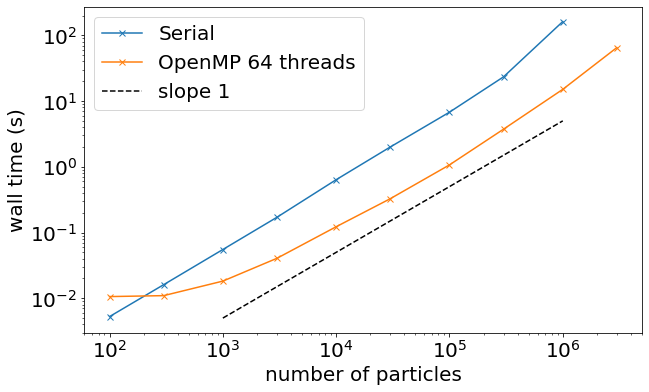

In [12]:
plt.figure(figsize=(10,6))
plt.loglog(serial_numparts,serial_times,'-x',label="Serial")
plt.loglog(omp_numparts,omp_times,'-x',label="OpenMP 64 threads")
plt.loglog([1e3,1e6],[5e-3,5],color='k',linestyle='--',label="slope 1")
print("Slope :",(np.log(times[-1])-np.log(times[0]))/(np.log(numparts[-1])-np.log(numparts[0])))
print("Slope (last 2 steps) :",(np.log(times[-1])-np.log(times[-3]))/(np.log(numparts[-1])-np.log(numparts[-3])))
plt.xlabel('number of particles')
plt.ylabel('wall time (s)');None
plt.legend()

# Strong scaling

In [13]:
# command:
# export OMP_NUM_THREADS=2;srun -n 1 -c 2 ./openmp -n 100000;export OMP_NUM_THREADS=4;srun -n 1 -c 4 ./openmp -n 100000;export OMP_NUM_THREADS=8;srun -n 1 -c 8 ./openmp -n 100000;export OMP_NUM_THREADS=16;srun -n 1 -c 16 ./openmp -n 100000;export OMP_NUM_THREADS=24;srun -n 1 -c 24 ./openmp -n 100000;export OMP_NUM_THREADS=32;srun -n 1 -c 32 ./openmp -n 100000;export OMP_NUM_THREADS=48;srun -n 1 -c 48 ./openmp -n 100000;export OMP_NUM_THREADS=64;srun -n 1 -c 64 ./openmp -n 100000

omp_outs = """Simulation Time = 6.85621 seconds for 100000 particles.
Simulation Time = 4.61357 seconds for 100000 particles.
Simulation Time = 1.98623 seconds for 100000 particles.
Simulation Time = 1.3402 seconds for 100000 particles.
Simulation Time = 0.831516 seconds for 100000 particles.
Simulation Time = 1.0345 seconds for 100000 particles.
Simulation Time = 0.707221 seconds for 100000 particles.
Simulation Time = 0.841346 seconds for 100000 particles."""

omp_times    = np.array([float(line.split(' ')[3] ) for line in omp_outs.split('\n')])
omp_nthreads = np.array([2,4,8,16,24,32,48,64])


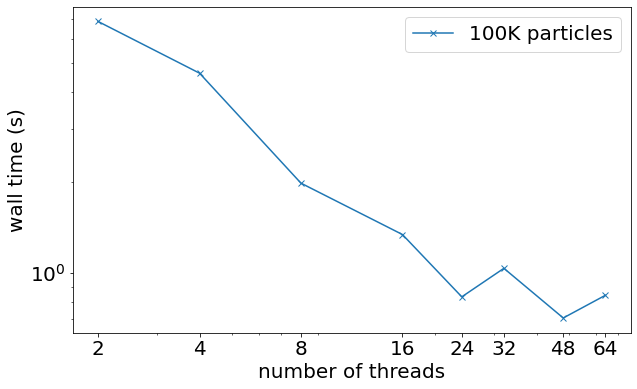

In [21]:
_,ax=plt.subplots(1,1,figsize=(10,6))
ax.loglog(omp_nthreads,omp_times,'-x',label="100K particles")
#plt.loglog(omp_numparts,omp_times,'-x',label="OpenMP 64 threads")
#plt.loglog([1e3,1e6],[5e-3,5],color='k',linestyle='--',label="slope 1")
ax.set_xticks(omp_nthreads)
ax.set_xticklabels(omp_nthreads)
ax.set_xlabel('number of threads')
ax.set_ylabel('wall time (s)');None
ax.legend()

# Weak scaling